## Logistic Regression

In [7]:
# Importing All Necessary Libraries required for Logistic Regression
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score

# Importing the dataset

In [ ]:
# Importing the dataset
df= pd.read_csv("candy-data.csv")

In [8]:
df.head

<bound method NDFrame.head of                 competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        Welch's Fruit Snacks          0       1        0               0   
83  Werther's Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  har

In [ ]:
## Checking for null values
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [ ]:
# Checking for duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(85, 13)

In [ ]:
# Exploratory Data Analysis
df.describe()
df.columns

# Checking the distribution of target variable

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

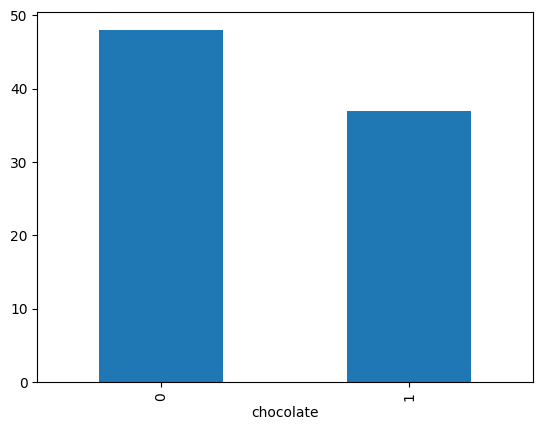

In [15]:
#drop duplicate rows if any
df['chocolate'].value_counts().plot(kind='bar')
plt.show()


In [ ]:
# explore data
df = pd.read_csv

In [16]:
# split training and testing data
X = df.drop(['chocolate','competitorname'], axis=1)
y = df['chocolate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# checking split data to avoid biasness
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(68, 11)
(17, 11)
(68,)
(17,)


In [20]:
# creating the dataframes for training and testing data
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values
test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values
train_df.head()
test_df.head()



,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,target
78,1,0,0,0,0,0,0,1,0.313,0.255,47.173229,0
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
68,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,0
22,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,1
12,1,0,0,0,0,0,0,1,0.046,0.325,24.524988,0


In [21]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
# Fitting Logistic Regression to the Training set
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
# Predicting the Test set results
y_pred = logmodel.predict(X_test)


In [24]:
# Checking the accuracy of the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[9 0]
 [1 7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17

Accuracy: 0.9411764705882353
